# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [36]:
library('tidyverse')
library('scales')
library('ggrepel')

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv]()

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [3]:
mmr <- read_csv(url('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv'))


── Column specification ────────────────────────────────────────────────────────
cols(
  index = col_double(),
  state = col_character(),
  year = col_character(),
  name = col_character(),
  type = col_character(),
  city = col_character(),
  county = col_character(),
  district = col_logical(),
  enroll = col_double(),
  mmr = col_double(),
  overall = col_double(),
  xrel = col_logical(),
  xmed = col_double(),
  xper = col_double(),
  lat = col_double(),
  lng = col_double()
)




The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [6]:
# create the df_vacc_rates here
mmr %>% head

mmr2 <- mmr %>% 
        filter(mmr>=0) %>% 
        group_by(state) %>% 
        summarize(n_above_95 = sum(mmr >= 95, na.rm=TRUE), 
                 obs = n(), 
                 frac_above_95 = n_above_95/obs)

mmr2               

        

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


state,n_above_95,obs,frac_above_95
<chr>,<int>,<int>,<dbl>
Arizona,593,1171,0.506404782
Arkansas,2,567,0.003527337
California,12639,14225,0.888506151
Colorado,939,1507,0.623092236
Connecticut,478,589,0.811544992
Illinois,6893,7686,0.896825397
Maine,169,357,0.473389356
Massachusetts,826,954,0.865828092
Minnesota,755,1593,0.473948525


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [12]:
mmr_min <- mmr2 %>%
            arrange(frac_above_95) %>% 
            head(1)
mmr_min

state,n_above_95,obs,frac_above_95
<chr>,<int>,<int>,<dbl>
Arkansas,2,567,0.003527337


Make a ECDF plot of the school vaccination rates in North Carolina. Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

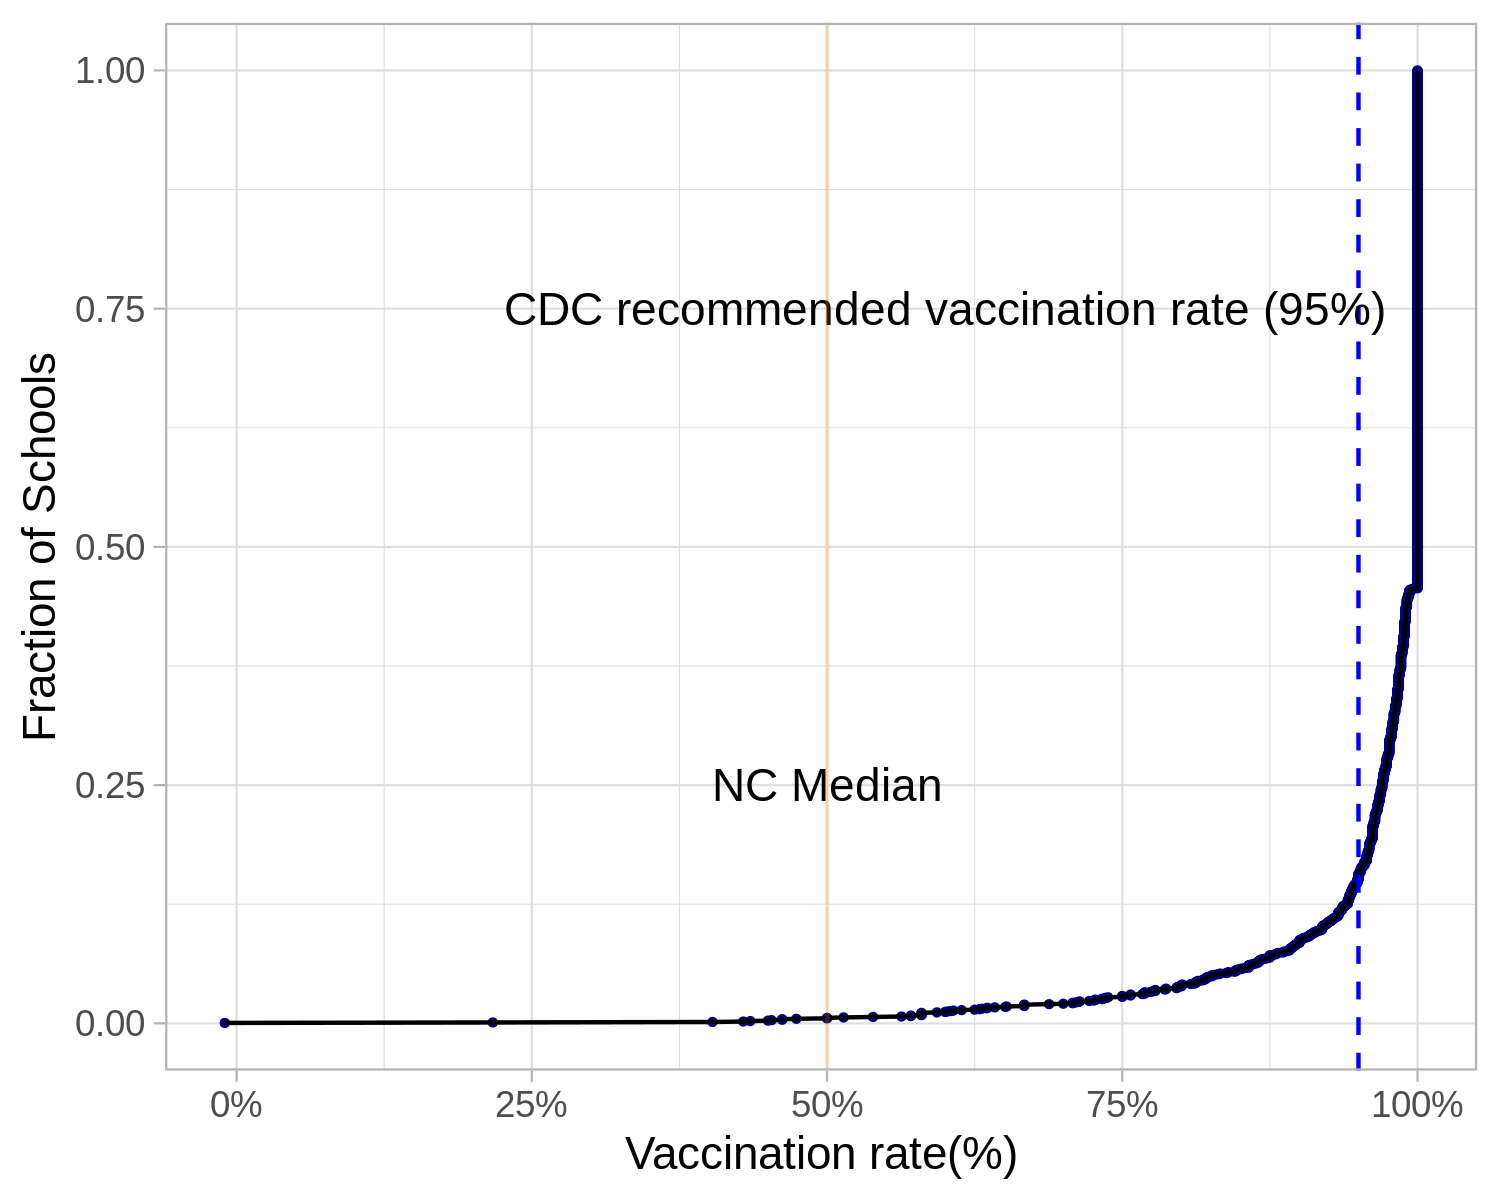

In [85]:
ecdf = mmr %>%
    filter(state=='North Carolina') %>%
    arrange(overall) %>%
    mutate(rn = row_number(), fraction_of_overall = rn / max(rn)) %>% 
    mutate(median = median(fraction_of_overall)*100)


p = ggplot(ecdf, aes(x = overall, y = fraction_of_overall)) 

p = p + geom_point(size=0.5, color="navy")

p = p + geom_line()

p = p + geom_vline(xintercept=95, linetype="dashed", color = "blue")

p = p + ylab("Fraction of Schools") + xlab("Vaccination rate(%)")

p = p + scale_x_continuous(label=percent_format(scale = 1))

p = p + annotate(geom="text", x=60, y=0.75, label="CDC recommended vaccination rate (95%)",
              color="black")
p = p + annotate(geom="text", x=50, y=0.25, label="NC Median",
              color="black")

#p = p + geom_hline(aes(yintercept = 0.50), color = 'orange')
p = p + geom_vline(aes(xintercept = median), color = 'orange', alpha =0.2)

p = p + theme_light()


p


In [80]:
(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: (My solution
        ^


![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [60]:
mmr %>%
    filter(state=='North Carolina') %>%
 #   summarize(median = median(overall)) %>% 
    mutate(rn = row_number(), fraction_of_overall = rn / max(rn))  %>%
    summarize(median = median(fraction_of_overall))

median
<dbl>
0.5002398


The median vaccination rate for NC schools is not above the CDC recommended target of 95%. NC has a vaccination rate of about 50%.